# Implementation

```{contents}
:local:
```

Some code snippets are modified from {cite}`foundations_of_data_science_with_python_2021` for my experimentation!

## Utilities

In [1]:
import sys
from pathlib import Path
parent_dir = str(Path().resolve().parents[3])
sys.path.append(parent_dir)

import random
import warnings

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

from omnivault.utils.reproducibility.seed import seed_all
def true_pmf(x: float, population: np.ndarray) -> float:
    r"""PMF of the true population: map X(\S) to a probability.

    Note:
        The PMF is completely determined if we know the true distribution.
    """
    return np.sum(population == x) / len(population)


def empirical_pmf(x: float, sample: np.ndarray) -> float:
    """Empirical distribution of the sample."""
    return np.sum(sample == x) / len(sample)

In [2]:
_ = seed_all(1992, set_torch_deterministic=False)

Using Seed Number 1992


## PMF and CDF

As $\lambda$ is the average number of occurences in a time period, it is not surprising that
the highest PMF is concentrated around $k$ that is nearest to $\lambda$. 

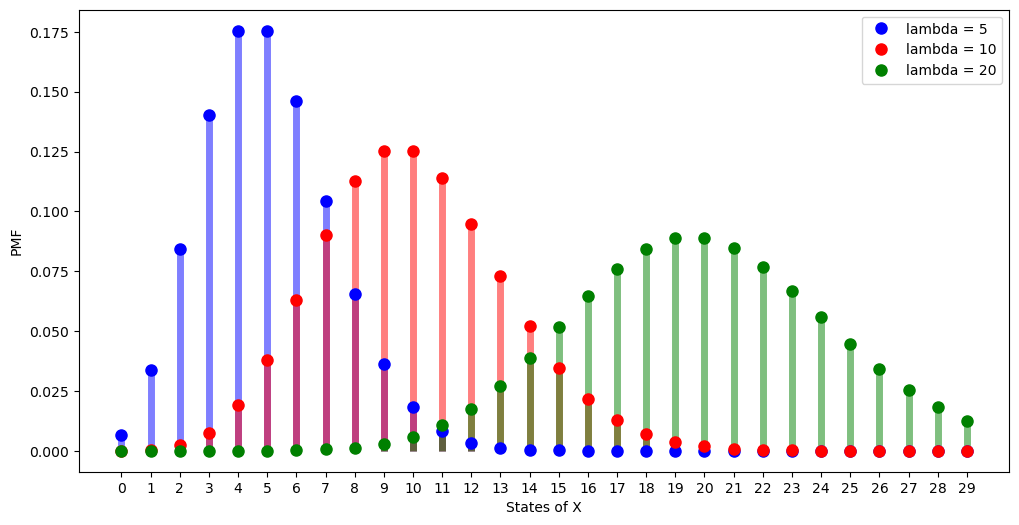

In [113]:
fig = plt.figure(figsize=(12, 6))
lambdas = [5, 10, 20]
markers = ["bo", "ro", "go"]
colors = ["b", "r", "g"]
x = np.arange(0, 30)

for lambda_, marker, color in zip(lambdas, markers, colors):
    rv = stats.poisson(lambda_)
    f = rv.pmf(x)
    plt.plot(
        x,
        f,
        marker,
        ms=8,
        label=f"lambda = {lambda_}",
    )
    plt.vlines(x, 0, f, colors=color, lw=5, alpha=0.5)
plt.ylabel("PMF")
plt.xlabel("States of X")
plt.xticks(x)
plt.legend()
plt.show()

Can use widgets also, idea taken from {cite}`foundations_of_data_science_with_python_2021`.

Notice that when $\lambda$ is large, then the distribution looks like normal distribution, we will talk about it when we study gaussian.

In [131]:
import ipywidgets as widgets

pvals = np.arange(0, 11)

def plot_poisson_pmf(lambda_):
    plt.clf()
    plt.stem(pvals, stats.poisson.pmf(pvals, mu=lambda_))
    plt.show()


widgets.interact(
    plot_poisson_pmf,
    lambda_=widgets.BoundedFloatText(
        value=5, min=0.2, max=5.1, step=0.1, description="lambda:", disabled=False
    ),
)

interactive(children=(BoundedFloatText(value=5.0, description='lambda:', max=5.1, min=0.2, step=0.1), Output()…

<function __main__.plot_poisson_pmf(lambda_)>

If generate enough samples, we note that the empirical histogram will converge to the true PMF.

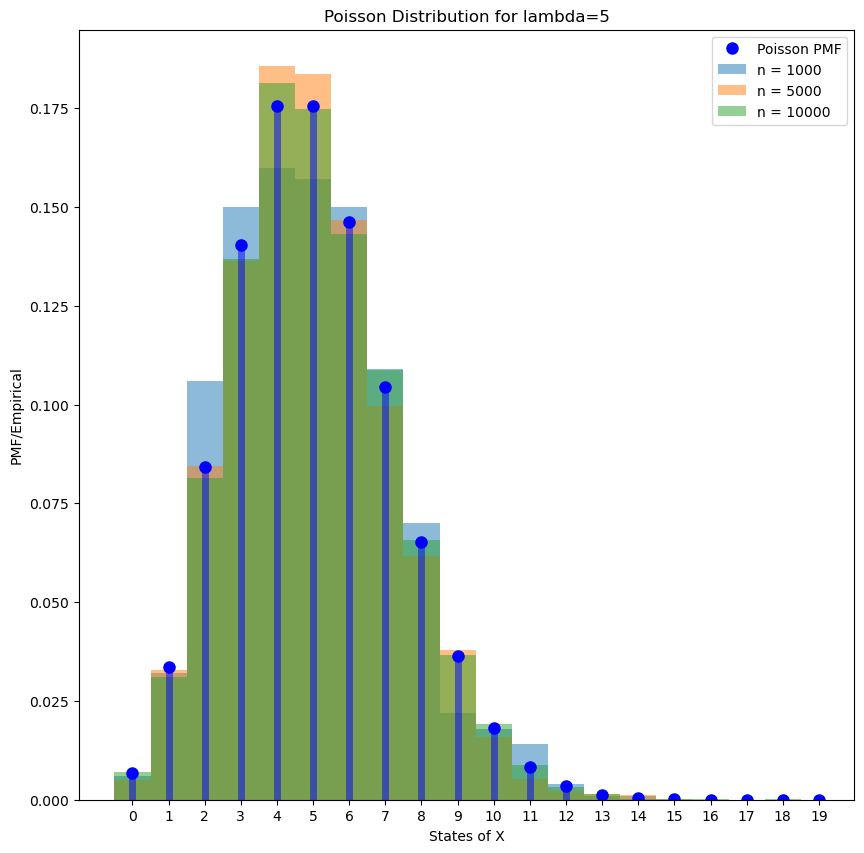

In [82]:
lambda_ = 5
x = np.arange(0, 20)
rv = stats.poisson(lambda_)
f = rv.pmf(x)

samples_1000 = rv.rvs(size=1000)
samples_5000 = rv.rvs(size=5000)
samples_10000 = rv.rvs(size=10000)

fig = plt.figure(figsize=(10, 10))

# plot PMF
plt.plot(x, f, "bo", ms=8, label="Poisson PMF")
plt.vlines(x, 0, f, colors="b", lw=5, alpha=0.5)

# plot empirical
for i, samples in enumerate([samples_1000, samples_5000, samples_10000]):
    bins = np.arange(0, samples.max() + 1.5) - 0.5
    plt.hist(samples, bins=bins, density=True, alpha=0.5, label="n = %d" % len(samples))
plt.ylabel("PMF/Empirical")
plt.xlabel("States of X")
plt.xticks(x)
plt.title(f"Poisson Distribution for lambda={lambda_}")
plt.legend()
plt.show()

The CDF is plotted below.

In [101]:
lambda_ = 5
x = np.arange(0, 20)
rv = stats.poisson(lambda_)
f = rv.pmf(x)

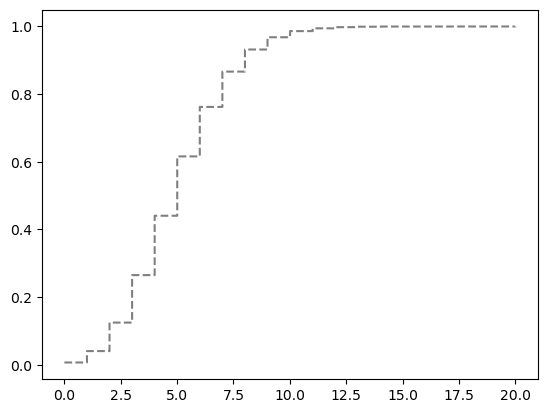

In [103]:
avals2 = np.linspace(0, 20, 1000)
plt.step(avals2, rv.cdf(avals2), "k--", where="post", alpha=0.5);

## Poisson Approximation of Binomial Distribution

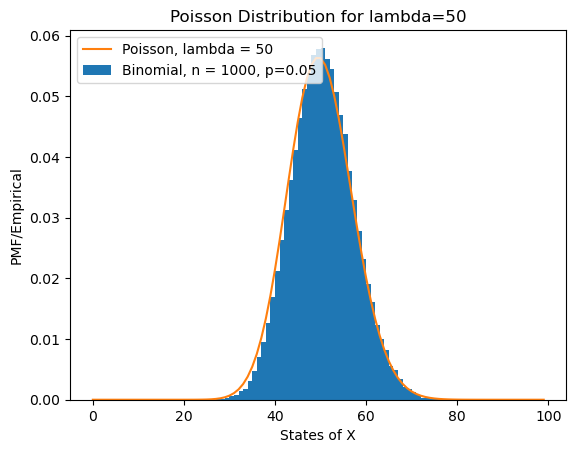

In [129]:
x = np.arange(0, 100, 1)

n = 1000
p = 0.05
rv1 = stats.binom(n, p)
X = rv1.rvs(size=100000)

plt.hist(X, bins=x, density=True, label="Binomial, n = 1000, p=0.05")

lambda_ = 50

rv = stats.poisson(lambda_)
f = rv.pmf(x)
plt.plot(
    x,
    f,
    ms=8,
    label=f"Poisson, lambda = {lambda_}",
)
plt.ylabel("PMF/Empirical")
plt.xlabel("States of X")
# plt.xticks(x)
plt.title(f"Poisson Distribution for lambda={lambda_}")
plt.legend()
plt.show();